In [157]:
import pandas as pd
import datetime

In [158]:
df = pd.read_csv("datasets/day.csv")

In [159]:
df.size

11696

In [160]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [161]:
df['temp_celsius'] = (df['temp']*41).round()
df['temp_celsius_realfeel'] = (df['atemp']*50).round()
df['hum'] = df['hum'] * 100
df['windspeed'] = df['windspeed'] * 67


In [162]:
df.drop(['temp','atemp'], axis=1, inplace=True)

In [163]:
df['dteday'] = pd.to_datetime(df['dteday'])
df.rename(columns={'season':'season_num'}, inplace=True)



In [164]:
df['season_name'] = df['season_num'].apply(lambda x: 'Winter' if x == 1 else 'Spring' if x == 2 else 'Summer' if x == 3 else 'Fall')

In [165]:
df['season_name'].value_counts()

Summer    188
Spring    184
Winter    181
Fall      178
Name: season_name, dtype: int64

In [166]:
seasons_grouped = df.groupby('season_name')

In [167]:
seasons_grouped['temp_celsius'].mean()

season_name
Fall      17.331461
Spring    22.331522
Summer    28.994681
Winter    12.182320
Name: temp_celsius, dtype: float64

In [168]:
seasons_grouped['cnt'].mean()

season_name
Fall      4728.162921
Spring    4992.331522
Summer    5644.303191
Winter    2604.132597
Name: cnt, dtype: float64

In [169]:
import requests
import json 

class WeatherData():


    def __init__(self):

        self.base_url = "https://archive-api.open-meteo.com/v1/archive"
        self.coordinates = '?latitude=38.8951&longitude=-77.0364'
        self.timezone = '&timezone=America%2FNew_York'

    def get_weather(self, start_date = '2011-01-01', end_date = '2012-12-31',
                    daily_list = ['weathercode,temperature_2m_max,temperature_2m_min,precipitation_sum',
                                  'windspeed_10m_max,winddirection_10m_dominant,shortwave_radiation_sum']):
        
        timeframe = ('&start_date='+ start_date + '&end_date=' + end_date)
        daily = ('&daily='+ ",".join((daily_list)))
        api_url = (self.base_url + self.coordinates + timeframe + daily + self.timezone)
        resp = requests.get(api_url)
        weather_data = resp.json()
        
        return weather_data
    
    def concat_to_df(self,df,my_weather):
        # Extract the data
        for measure in my_weather['daily']:

            daily_measure = my_weather['daily'][measure]
            unit_of_measure = my_weather['daily_units'][measure]

            # Iterate over the rows in the DataFrame
            for index, row in df.iterrows():
                custom_index = index 
                measure_value = daily_measure[custom_index]

                # Assign the value to the respective row in the DataFrame
                name = measure + '_' + unit_of_measure
                df.at[index, name] = measure_value

            
dc_weather = WeatherData()
my_weather = dc_weather.get_weather()
dc_weather.concat_to_df(df, my_weather)

In [170]:
pd.set_option('display.max_columns', None)
df.head()

,instant,dteday,season_num,yr,mnth,holiday,weekday,workingday,weathersit,hum,windspeed,casual,registered,cnt,temp_celsius,temp_celsius_realfeel,season_name,time_iso8601,weathercode_wmo code,temperature_2m_max_°C,temperature_2m_min_°C,precipitation_sum_mm,windspeed_10m_max_km/h,winddirection_10m_dominant_°,shortwave_radiation_sum_MJ/m²
0,1,2011-01-01,1,0,1,0,6,0,2,80.5833,10.749882,331,654,985,14.0,18.0,Winter,2011-01-01,61.0,14.7,1.3,2.5,17.7,197.0,5.59
1,2,2011-01-02,1,0,1,0,0,0,2,69.6087,16.652113,131,670,801,15.0,18.0,Winter,2011-01-02,55.0,13.8,1.8,3.0,18.9,299.0,1.25
2,3,2011-01-03,1,0,1,0,1,1,1,43.7273,16.636703,120,1229,1349,8.0,9.0,Winter,2011-01-03,1.0,3.3,-3.0,0.0,17.4,299.0,10.22
3,4,2011-01-04,1,0,1,0,2,1,1,59.0435,10.739832,108,1454,1562,8.0,11.0,Winter,2011-01-04,1.0,6.8,-4.1,0.0,11.2,215.0,9.93
4,5,2011-01-05,1,0,1,0,3,1,1,43.6957,12.522300,82,1518,1600,9.0,11.0,Winter,2011-01-05,1.0,4.1,-4.1,0.0,13.9,314.0,9.22


In [171]:
df.drop(['instant','yr','mnth','time_iso8601'], axis=1, inplace=True)

In [172]:
import math

wind_direction_categories = {
    'N': (337.5, 22.5),
    'NE': (22.5, 67.5),
    'E': (67.5, 112.5),
    'SE': (112.5, 157.5),
    'S': (157.5, 202.5),
    'SW': (202.5, 247.5),
    'W': (247.5, 292.5),
    'NW': (292.5, 337.5)
}

def map_wind_direction(degrees):
    for direction, (start, end) in wind_direction_categories.items():
        if start <= degrees < end:
            return direction
    return ''

df['wind_direction'] = df['winddirection_10m_dominant_°'].apply(lambda x: map_wind_direction(x))

df.head()

,dteday,season_num,holiday,weekday,workingday,weathersit,hum,windspeed,casual,registered,cnt,temp_celsius,temp_celsius_realfeel,season_name,weathercode_wmo code,temperature_2m_max_°C,temperature_2m_min_°C,precipitation_sum_mm,windspeed_10m_max_km/h,winddirection_10m_dominant_°,shortwave_radiation_sum_MJ/m²,wind_direction
0,2011-01-01,1,0,6,0,2,80.5833,10.749882,331,654,985,14.0,18.0,Winter,61.0,14.7,1.3,2.5,17.7,197.0,5.59,S
1,2011-01-02,1,0,0,0,2,69.6087,16.652113,131,670,801,15.0,18.0,Winter,55.0,13.8,1.8,3.0,18.9,299.0,1.25,NW
2,2011-01-03,1,0,1,1,1,43.7273,16.636703,120,1229,1349,8.0,9.0,Winter,1.0,3.3,-3.0,0.0,17.4,299.0,10.22,NW
3,2011-01-04,1,0,2,1,1,59.0435,10.739832,108,1454,1562,8.0,11.0,Winter,1.0,6.8,-4.1,0.0,11.2,215.0,9.93,SW
4,2011-01-05,1,0,3,1,1,43.6957,12.522300,82,1518,1600,9.0,11.0,Winter,1.0,4.1,-4.1,0.0,13.9,314.0,9.22,NW


In [173]:
df['windy_cat'] = df['windspeed_10m_max_km/h'].apply(lambda x: 'low' if x <= 20 else 
                                                     'medium' if x <= 30 else 
                                                     'high')

In [174]:
df.head()

,dteday,season_num,holiday,weekday,workingday,weathersit,hum,windspeed,casual,registered,cnt,temp_celsius,temp_celsius_realfeel,season_name,weathercode_wmo code,temperature_2m_max_°C,temperature_2m_min_°C,precipitation_sum_mm,windspeed_10m_max_km/h,winddirection_10m_dominant_°,shortwave_radiation_sum_MJ/m²,wind_direction,windy_cat
0,2011-01-01,1,0,6,0,2,80.5833,10.749882,331,654,985,14.0,18.0,Winter,61.0,14.7,1.3,2.5,17.7,197.0,5.59,S,low
1,2011-01-02,1,0,0,0,2,69.6087,16.652113,131,670,801,15.0,18.0,Winter,55.0,13.8,1.8,3.0,18.9,299.0,1.25,NW,low
2,2011-01-03,1,0,1,1,1,43.7273,16.636703,120,1229,1349,8.0,9.0,Winter,1.0,3.3,-3.0,0.0,17.4,299.0,10.22,NW,low
3,2011-01-04,1,0,2,1,1,59.0435,10.739832,108,1454,1562,8.0,11.0,Winter,1.0,6.8,-4.1,0.0,11.2,215.0,9.93,SW,low
4,2011-01-05,1,0,3,1,1,43.6957,12.522300,82,1518,1600,9.0,11.0,Winter,1.0,4.1,-4.1,0.0,13.9,314.0,9.22,NW,low


In [175]:
df.columns

Index(['dteday', 'season_num', 'holiday', 'weekday', 'workingday',
       'weathersit', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'temp_celsius', 'temp_celsius_realfeel', 'season_name',
       'weathercode_wmo code', 'temperature_2m_max_°C',
       'temperature_2m_min_°C', 'precipitation_sum_mm',
       'windspeed_10m_max_km/h', 'winddirection_10m_dominant_°',
       'shortwave_radiation_sum_MJ/m²', 'wind_direction', 'windy_cat'],
      dtype='object')

In [176]:
df.rename(columns={'dteday': 'dtime', 'temperature_2m_max_°C': 'temp_max','season':'season_num', 'temperature_2m_min_°C': 'temp_min',
                    'windspeed_10m_max_km/h': 'windspeed_km/h', 'winddirection_10m_dominant_°': 'wind_direction_deg',
                      'shortwave_radiation_sum_MJ/m²': 'shortwave_radiation_MJ/m²'},
                    inplace=True)

In [177]:
df.head()

,dtime,season_num,holiday,weekday,workingday,weathersit,hum,windspeed,casual,registered,cnt,temp_celsius,temp_celsius_realfeel,season_name,weathercode_wmo code,temp_max,temp_min,precipitation_sum_mm,windspeed_km/h,wind_direction_deg,shortwave_radiation_MJ/m²,wind_direction,windy_cat
0,2011-01-01,1,0,6,0,2,80.5833,10.749882,331,654,985,14.0,18.0,Winter,61.0,14.7,1.3,2.5,17.7,197.0,5.59,S,low
1,2011-01-02,1,0,0,0,2,69.6087,16.652113,131,670,801,15.0,18.0,Winter,55.0,13.8,1.8,3.0,18.9,299.0,1.25,NW,low
2,2011-01-03,1,0,1,1,1,43.7273,16.636703,120,1229,1349,8.0,9.0,Winter,1.0,3.3,-3.0,0.0,17.4,299.0,10.22,NW,low
3,2011-01-04,1,0,2,1,1,59.0435,10.739832,108,1454,1562,8.0,11.0,Winter,1.0,6.8,-4.1,0.0,11.2,215.0,9.93,SW,low
4,2011-01-05,1,0,3,1,1,43.6957,12.522300,82,1518,1600,9.0,11.0,Winter,1.0,4.1,-4.1,0.0,13.9,314.0,9.22,NW,low


In [178]:
df = df[['dtime','season_name','season_num','weekday', 'holiday',
       'workingday', 'weathersit', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'temp_celsius', 'temp_celsius_realfeel',
       'weathercode_wmo code', 'temp_max', 'temp_min', 'precipitation_sum_mm',
       'windspeed_km/h', 'wind_direction_deg', 'shortwave_radiation_MJ/m²',
       'wind_direction', 'windy_cat']]

In [179]:
df.columns

Index(['dtime', 'season_name', 'season_num', 'weekday', 'holiday',
       'workingday', 'weathersit', 'hum', 'windspeed', 'casual', 'registered',
       'cnt', 'temp_celsius', 'temp_celsius_realfeel', 'weathercode_wmo code',
       'temp_max', 'temp_min', 'precipitation_sum_mm', 'windspeed_km/h',
       'wind_direction_deg', 'shortwave_radiation_MJ/m²', 'wind_direction',
       'windy_cat'],
      dtype='object')

In [180]:
df['season_name'] = df['season_name'].astype('category')
df['temp_celsius'] = df['temp_celsius'].astype('int')
df['temp_celsius_realfeel'] = df['temp_celsius_realfeel'].astype('int')
df['temp_max'] = df['temp_max'].astype('int')
df['temp_min'] = df['temp_min'].astype('int')
df['hum'] = df['hum'].astype('int')
df['windspeed_km/h'] = df['windspeed_km/h'].astype('int')
df['wind_direction'] = df['wind_direction'].astype('category')
df['windy_cat'] = df['windy_cat'].astype('category')

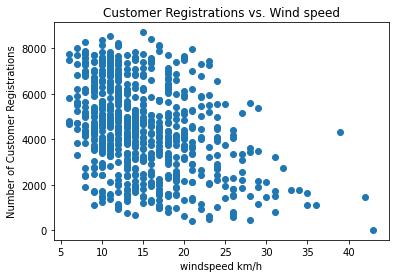

In [183]:
import matplotlib.pyplot as plt

# Plotting the data
plt.scatter(df['windspeed_km/h'], df['cnt'])
plt.xlabel('windspeed km/h')
plt.ylabel('Number of Customer Registrations')
plt.title('Customer Registrations vs. Wind speed')
plt.show()

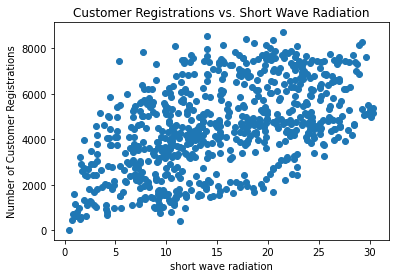

In [184]:
import matplotlib.pyplot as plt

# Plotting the data
plt.scatter(df['shortwave_radiation_MJ/m²'], df['cnt'])
plt.xlabel('short wave radiation')
plt.ylabel('Number of Customer Registrations')
plt.title('Customer Registrations vs. Short Wave Radiation')
plt.show()

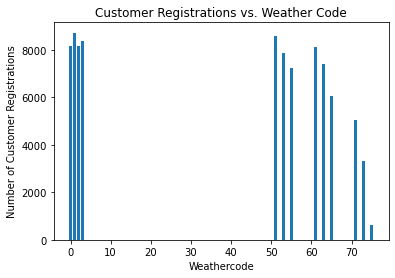

In [185]:
import matplotlib.pyplot as plt

# Plotting the data
plt.bar(df['weathercode_wmo code'], df['cnt'])
plt.xlabel('Weathercode')
plt.ylabel('Number of Customer Registrations')
plt.title('Customer Registrations vs. Weather Code')
plt.show()

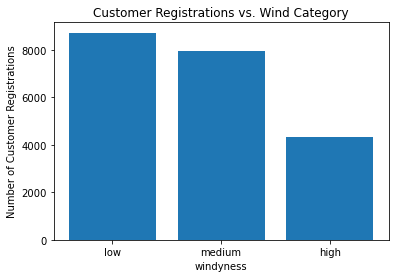

In [188]:
import matplotlib.pyplot as plt

# Plotting the data
plt.bar(df['windy_cat'], df['cnt'])
plt.xlabel('windyness')
plt.ylabel('Number of Customer Registrations')
plt.title('Customer Registrations vs. Wind Category')
plt.show()